In [1]:
import numpy as np
import matplotlib
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers, models
from keras import backend as K
import seaborn as sn


import matplotlib
from tensorflow.keras.models import load_model

In [2]:
def load_data_tf(data_path: str, img_shape=(256,256), batch_size: int=64):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_path,
        validation_split=0.3,
        subset="training",
        label_mode='categorical',
        seed=123,
        image_size=img_shape,
        batch_size=batch_size)
    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_path,
        validation_split=0.3,
        subset="validation",
        label_mode='categorical',
        seed=123,
        image_size=img_shape,
        batch_size=batch_size)
    return train_ds, val_ds
    

In [3]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)
# else:
#     print('No GPUs detected')

In [4]:
# load model without attention
alex = load_model('model_alex')

In [5]:
# load model with S=2,4,5
a123 = load_model('model_alex_att')

Instructions for updating:
Use fn_output_signature instead
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC8EE28CA0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC8EE28CA0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC8EE28CA0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC8EE28CA0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_n

In [6]:
# load model with S=3
a2 = load_model('model_alex_att_l2_test')

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC8EBC0550>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC8EBC0550>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
# load model with S=2,4
a23 = load_model('model_alex_att_l23')

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96F504C0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96F504C0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96F504C0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96F504C0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:
a123.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 resizing (Resizing)            (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['resizing[0][0]']               
                                                                                                  
 conv2d (Conv2D)                (None, 54, 54, 96)   34944       ['rescaling[0][0]']          

In [9]:
tf.autograph.set_verbosity(0)

In [10]:
train_dataset, test_val_ds = load_data_tf('cov_data', img_shape = (256,256), batch_size=5)

Found 4575 files belonging to 3 classes.
Using 3203 files for training.
Found 4575 files belonging to 3 classes.
Using 1372 files for validation.


In [11]:
val_dataset = test_val_ds.shuffle(4).take(86)
test_dataset = test_val_ds.shuffle(4).skip(86)

In [12]:
print(f"{train_dataset.cardinality().numpy()}, {val_dataset.cardinality().numpy()}, {test_dataset.cardinality().numpy()}")

641, 86, 189


In [13]:
acc = alex.evaluate(test_dataset)

189/189 [==============================] - 25s 121ms/step - loss: 0.3010 - accuracy: 0.9321


In [14]:
acc123 = a123.evaluate(test_dataset)

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96C57670>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96C57670>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96C57670>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
189/189 [==============================] - 33s 165ms/step - loss: 0.3022 - accuracy: 0.9225


In [15]:
acc2 = a2.evaluate(test_dataset)

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC970FA280>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
189/189 [==============================] - 25s 120ms/step - loss: 0.3203 - accuracy: 0.9098


In [16]:
acc23 = a23.evaluate(test_dataset)

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC9717D940>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC9717D820>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
189/189 [==============================] - 25s 123ms/step - loss: 0.3313 - accuracy: 0.8938


In [17]:
labels = []
images = []
for image, label in test_dataset.unbatch():
    images.append(image)
    labels.append(label)

In [18]:
images = np.array(images)
labels = np.array(labels)

In [19]:
pred = alex.predict(images)

In [20]:
a123_pred = a123.predict(images)

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96D3D430>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96D3D430>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC96D3D430>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [21]:
a2_pred = a2.predict(images)

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC972BC550>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [22]:
a23_pred = a23.predict(images)

Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC972BCCA0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda>.<locals>.<lambda> at 0x000001DC972BCCA0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [23]:
labels = np.argmax(labels,axis=-1)
a123_predictions=np.argmax(a123_pred,axis=-1)
a23_predictions=np.argmax(a23_pred,axis=-1)
a2_predictions=np.argmax(a2_pred,axis=-1)

In [24]:
alex_predictions = np.argmax(pred,axis=-1)

In [25]:
def eval_model(y_true, y_pred, labels):
    pr = precision_score(y_true=y_true, y_pred=y_pred, labels=labels,average=None)[0]
    rc = recall_score(y_true=y_true, y_pred=y_pred, labels=labels,average=None)[0]
    f1 = f1_score(y_true=y_true, y_pred=y_pred, labels=labels,average=None)[0]
    return pr, rc, f1

In [26]:
pr123, rc123, f123 = eval_model(y_true=labels, y_pred=a123_predictions,labels=[1])

In [27]:
pr23, rc23, f23 = eval_model(y_true=labels, y_pred=a23_predictions,labels=[1])

In [28]:
pr2, rc2, f2= eval_model(y_true=labels, y_pred=a2_predictions,labels=[1])

In [29]:
pr, rc, f1 = eval_model(y_true=labels, y_pred=alex_predictions,labels=[1])

In [30]:
models = ['AlexNet\nNo attention', 'AlexNet+Attention\nS={2,4,5}', 'AlexNet+Attention\nS={2,4}', 'AlexNet+Attention\nS={3}']

In [31]:
accuracy_array = [acc[1], acc123[1], acc23[1], acc2[1]]
recall_array = [rc, rc123, rc23, rc2]
precision_array = [pr, pr123, pr23, pr2]
f1_array = [f1, f123, f23, f2]

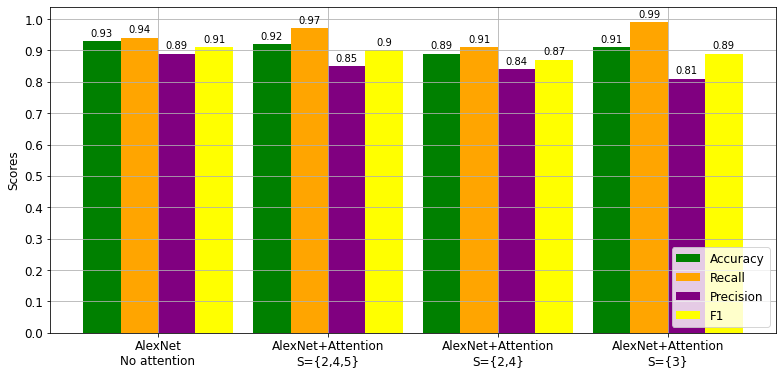

In [32]:
matplotlib.rcParams.update({'font.size': 12})
x = np.arange(4)
width = 0.22
fig, ax = plt.subplots(figsize=(13,6))
rects1 = ax.bar(x - width, np.round(accuracy_array,2), width, color = 'green', label='Accuracy')
rects2 = ax.bar(x, np.round(recall_array,2), width, color = 'orange', label='Recall')
rects3 = ax.bar(x + width, np.round(precision_array, 2), width, color = 'purple', label='Precision')
rects4 = ax.bar(x + 2*width, np.round(f1_array, 2), width, color = 'yellow', label='F1')
for v in rects1:
    height = v.get_height()
    ax.annotate('{}'.format(height),
                xy=(v.get_x() + v.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize = 10)
for v in rects2:
    height = v.get_height()
    ax.annotate('{}'.format(height),
                xy=(v.get_x() + v.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize = 10)    
for v in rects3:
    height = v.get_height()
    ax.annotate('{}'.format(height),
                xy=(v.get_x() + v.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize = 10)
for v in rects4:
    height = v.get_height()
    ax.annotate('{}'.format(height),
                xy=(v.get_x() + v.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize = 10)
#ax.set_title('')
ax.set_ylabel('Scores')
ax.grid(True)
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.xticks(x + width/2, models)
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc ='lower right')
plt.show()